# MSDS696 Practicum 2 
## Fall 8W2 2020

## Unsupervised CLuster Analysis of County Demographics and Voting Histories

#### James D. Reed (jreed011@regis.edu)

<img src="../img/Mountains2.jpg" width="700" height="200" />

### Model County Voter Behavior and Demographics


In [5]:
import requests
import pandas as pd
import geopandas as gpd
import censusdata
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import censusFunctions as cf
import abstractFunctions as af
from tabulate import tabulate
import censusFunctions as cf
import pickle
import os
%matplotlib inline
plt.style.use("ggplot")

In [6]:
from notebook import notebookapp
host_detail = list(notebookapp.list_running_servers())
host_name = host_detail[0]['hostname']
print(f'Host name: {host_name}')
print(f'Current working directoy: {os.getcwd()}')

Host name: woolsey
Current working directoy: /home/jdreed/MSDS696/notebooks


In [7]:
counties = ['Adams',  'Alamosa',  'Arapahoe',  'Archuleta',  'Baca',  'Bent', 'Boulder', 
            'Chaffee', 'Cheyenne', 'Clear Creek', 'Conejos', 'Costilla', 
            'Crowley', 'Custer', 'Delta', 'Denver', 'Dolores', 'Douglas', 'Eagle', 'Elbert', 
            'El Paso', 'Fremont', 'Garfield', 'Gilpin', 'Grand', 'Gunnison', 'Hinsdale', 
            'Huerfano', 'Jackson', 'Jefferson', 'Kiowa', 'Kit Carson', 'La Plata', 'Lake', 
            'Larimer', 'Las Animas', 'Lincoln', 'Logan', 'Mesa', 'Mineral', 'Moffat', 
            'Montezuma', 'Montrose', 'Morgan', 'Otero', 'Ouray', 'Park', 'Phillips', 
            'Pitkin', 'Prowers', 'Pueblo', 'Rio Blanco', 'Rio Grande', 'Routt', 'Saguache', 
            'San Juan', 'San Miguel', 'Sedgwick', 'Summit', 'Teller', 'Washington', 
            'Weld', 'Yuma'] 

county_fips = {"Adams": "001",          "Alamosa": "003",        "Arapahoe":  "005",      "Archuleta": "007",      "Baca": "009", 
               "Bent": "011",          "Boulder": "013",         "Chaffee": "015",           "Cheyenne": "017",     "Clear Creek": "019", 
               "Conejos": "021",       "Costilla":  "023",          "Crowley":  "025",          "Custer": "027",          "Delta":  "029", 
               "Denver": "031",        "Dolores": "033",          "Douglas": "035",           "Eagle": "037",           "Elbert": "039", 
               "El Paso": "041",       "Fremont": "043",         "Garfield": "045",            "Gilpin":  "047",         "Grand": "049", 
               "Gunnison": "051",      "Hinsdale": "053",         "Huerfano": "055",         "Jackson": "057",       "Jefferson":  "059", 
               "Kiowa": "061",         "Kit Carson": "063",      "La Plata": "067",            "Lake": "065",            "Larimer":  "069", 
               "Las Animas": "071",    "Lincoln": "073",           "Logan": "075",              "Mesa": "077",           "Mineral": "079", 
               "Moffat": "081",        "Montezuma":  "083",  "Montrose": "085",        "Morgan": "087",       "Otero": "089", 
               "Ouray": "091",         "Park": "093",                "Phillips": "095",            "Pitkin":   "097",          "Prowers": "099", 
               "Pueblo": "101",        "Rio Blanco": "103",      "Rio Grande": "105",     "Routt": "107",            "Saguache":  "109", 
               "San Juan": "111",      "San Miguel": "113",     "Sedgwick": "115",        "Summit": "117",         "Teller": "119", 
               "Washington": "121",    "Weld": "123",               "Yuma": "125"} 

months = {'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,
          'July': 7,'August': 8, 'September': 9,'October': 10,'November': 11,'December': 12}

county_fips_fn = "../data/processed/fips_county.csv"
county_fips_df = pd.read_csv(county_fips_fn,usecols=[0,1], index_col = "fips")

state_fips_fn = "../data/processed/fips_states.csv"
state_fips_df = pd.read_csv(state_fips_fn,usecols=[0,1], index_col = "fips")

print(f'county_fips["Adams"] {county_fips["Adams"]}')


county_fips["Adams"] 001


In [9]:
county_designation_df = pd.read_csv("../data/raw/colorado_county_designation.csv", index_col = 'county', squeeze = True)
county_designation_df

,city,designation
county,,
Adams,Brighton,Urban
Arapahoe,Littleton,Urban
Boulder,Boulder,Urban
Denver,Denver,Urban
El Paso,Colorado Springs,Urban
...,...,...
Saguache,Saguache,Frontier
San Juan,Silverton,Frontier
Sedgwick,Julesburg,Frontier


In [10]:
df = county_designation_df.copy(deep = True)
desigName = df['designation'].copy()
df['state_id'] = 8
df.drop(labels = 'Broomfield', inplace = True)
county_codes = [county_fips[c] for c in df.index.values]
df['county_id'] = county_codes
df.head()
new_cols = df.columns.str.strip()
df.columns = new_cols
df['designation'] = df['designation'].str.strip()
df['designation'] = df['designation'].astype('category')
designation_nums = {"designation":     {"Frontier": 1, "Rural": 2, "Suburban": 3, "Urban": 4}}

df = df.replace(designation_nums)
df.drop(labels = "city", axis = 1, inplace = True)
df['desigName'] = desigName
df['county_id'] = df['county_id'].astype(int)
county_designation_df = df.copy(deep = True)

county_designation_df

,designation,state_id,county_id,desigName
county,,,,
Adams,4,8,1,Urban
Arapahoe,4,8,5,Urban
Boulder,4,8,13,Urban
Denver,4,8,31,Urban
El Paso,4,8,41,Urban
...,...,...,...,...
Saguache,1,8,109,Frontier
San Juan,1,8,111,Frontier
Sedgwick,1,8,115,Frontier


vmin: 1 vmax: 4


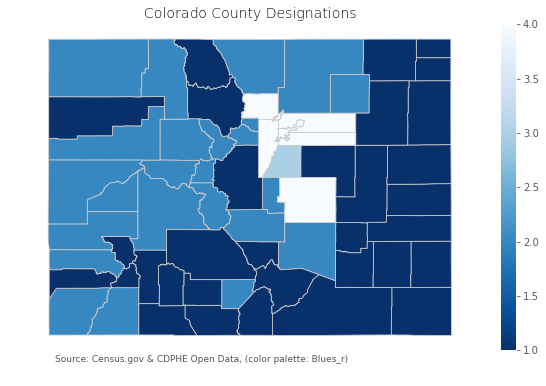

In [11]:
cf.gen_colo_choropleth(df, 'Colorado_County_Designations', 'designation', 'Colorado County Designations', palette = 'Blues_r')

---
## Load Census 2010 Population Data Frame

In [12]:
df_pop = cf.load_pickled_df('../data/processed/Census2010-population_df.p')
df_hou = cf.load_pickled_df('../data/processed/Census2010-housing_df.p')
df_gen = cf.load_pickled_df('../data/processed/Census2010-gender_df.p')

In [13]:
df_pop

,county,total_pop,total_urb_rur,urban,urban_ins_ars,urban_ins_cls,rural,total_race,white,black,american_indian,asian,nat_hawaiian,some_othr_race,two_or_more_races,hisp_latino,not_hisp_latino,total_hisp_latino,state_id,county_id
0,Costilla,3524,3524,0,0,0,3524,3524,2397,24,104,34,9,803,153,3524,1197,2327,8,23
1,Crowley,5823,5823,0,0,0,5823,5823,4509,559,139,59,0,456,101,5823,4137,1686,8,25
2,Custer,4255,4255,0,0,0,4255,4255,4055,44,30,16,0,39,71,4255,4055,200,8,27
3,Delta,30952,30952,11399,0,11399,19553,30952,27761,160,295,160,15,1862,699,30952,26607,4345,8,29
4,Denver,600158,600158,600158,600158,0,0,600158,413696,61435,8237,20433,607,71191,24559,600158,409193,190965,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Broomfield,55889,55889,55563,55563,0,326,55889,48099,587,336,3407,43,1848,1569,55889,49673,6216,8,14
60,Chaffee,17809,17809,11146,0,11146,6663,17809,16598,275,192,106,9,345,284,17809,16131,1678,8,15
61,Cheyenne,1836,1836,0,0,0,1836,1836,1711,7,13,11,1,75,18,1836,1658,178,8,17
62,Clear Creek,9088,9088,0,0,0,9088,9088,8664,56,72,51,3,86,156,9088,8659,429,8,19


---
## Load County Abstract Data

In [14]:
df1952 = cf.load_pickled_df('../data/processed/abstracts/co_1952_majority.p')
df1956 = cf.load_pickled_df('../data/processed/abstracts/co_1956_majority.p')
df1960 = cf.load_pickled_df('../data/processed/abstracts/co_1960_majority.p')
df1964 = cf.load_pickled_df('../data/processed/abstracts/co_1964_majority.p')
df1968 = cf.load_pickled_df('../data/processed/abstracts/co_1968_majority.p')
df1972 = cf.load_pickled_df('../data/processed/abstracts/co_1972_majority.p')
df1972.drop(columns = ['No.'], inplace = True)
df1976 = cf.load_pickled_df('../data/processed/abstracts/co_1976_majority.p')
df1980 = cf.load_pickled_df('../data/processed/abstracts/co_1980_majority.p')
df2020 = cf.load_pickled_df('../data/processed/abstracts/co_2020_majority.p')
#df2020.drop(['Broomfield'], inplace = True)

cnty_fips = df2020['CNTY_FIPS']
edf = pd.DataFrame(columns = None, index = counties)

def merge_majority_rec(edfi, dfi, year):
    edf = edfi.copy(deep = True)
    df = dfi.copy(deep = True)
    sdf = gen_majority_records(df,year)
    edf = edf.merge(sdf, how = 'outer', left_index = True, right_index = True)
    return edf


def gen_majority_records(dfi,year):
    m_recs = []
    counties = []
    majority = []
    df = dfi.copy(deep = True)
    for j, row in df.iterrows():
        cnty = row[0]
        counties.append(cnty)
        m = row[-2]
        if m == 'Republican':
            maj = 1
        else:
            maj = 0
        majority.append(maj)
    a_dict = {k:v for k,v in zip(counties,majority)}
    #print(f"Boulder majority: {a_dict['Boulder']}")
    series = pd.Series(a_dict,index = df['County'], name = 'M' + str(year))
    return series


edf = merge_majority_rec(edf,df1952, 1952)
edf = merge_majority_rec(edf,df1956, 1956)
edf = merge_majority_rec(edf,df1960, 1960)
edf = merge_majority_rec(edf,df1964, 1964)
edf = merge_majority_rec(edf,df1968, 1968)
edf = merge_majority_rec(edf,df1972, 1972)
edf = merge_majority_rec(edf,df1976, 1976)
edf = merge_majority_rec(edf,df1980, 1980)
edf = merge_majority_rec(edf,df2020, 2020)

### Merge Census data with Election Data

In [15]:
df_pop

,county,total_pop,total_urb_rur,urban,urban_ins_ars,urban_ins_cls,rural,total_race,white,black,american_indian,asian,nat_hawaiian,some_othr_race,two_or_more_races,hisp_latino,not_hisp_latino,total_hisp_latino,state_id,county_id
0,Costilla,3524,3524,0,0,0,3524,3524,2397,24,104,34,9,803,153,3524,1197,2327,8,23
1,Crowley,5823,5823,0,0,0,5823,5823,4509,559,139,59,0,456,101,5823,4137,1686,8,25
2,Custer,4255,4255,0,0,0,4255,4255,4055,44,30,16,0,39,71,4255,4055,200,8,27
3,Delta,30952,30952,11399,0,11399,19553,30952,27761,160,295,160,15,1862,699,30952,26607,4345,8,29
4,Denver,600158,600158,600158,600158,0,0,600158,413696,61435,8237,20433,607,71191,24559,600158,409193,190965,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Broomfield,55889,55889,55563,55563,0,326,55889,48099,587,336,3407,43,1848,1569,55889,49673,6216,8,14
60,Chaffee,17809,17809,11146,0,11146,6663,17809,16598,275,192,106,9,345,284,17809,16131,1678,8,15
61,Cheyenne,1836,1836,0,0,0,1836,1836,1711,7,13,11,1,75,18,1836,1658,178,8,17
62,Clear Creek,9088,9088,0,0,0,9088,9088,8664,56,72,51,3,86,156,9088,8659,429,8,19


### Merge Election Performance (Democrat/Republican) by Party

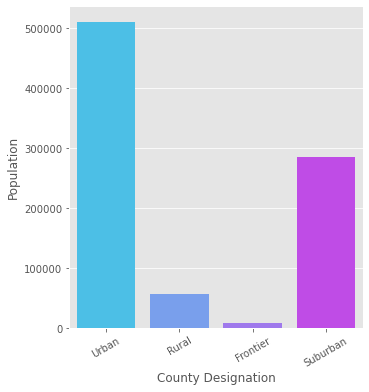

In [16]:
def merge_censusdf(cdfi, dfi):
    edf = cdfi.copy(deep = True)
    df = dfi.copy(deep = True)
    edf = edf.merge(df, how = 'outer', left_index = True, right_index = True)
    return edf

df = df_pop.copy(deep = True)
df.set_index('county', inplace = True)
df

pop_edf_df = merge_censusdf(edf, df)
pop_edf_df



##########################################
pop_edf_designation = merge_censusdf(pop_edf_df, county_designation_df)
pop_edf_designation.drop(labels='Broomfield', inplace = True)
#print(pop_edf_designation.shape)
#print(pop_edf_designation['total_pop'])

sns.catplot(x = "desigName", y = 'total_pop', data = pop_edf_designation, palette = "cool",
            kind = 'bar', ci = None, legend = True)
plt.xlabel('County Designation')
plt.xticks(x = 'designame', rotation= 30)
plt.ylabel('Population')
fn = "../img/" + "co_designation_population_bar.png"
plt.savefig(fn, bbox_inches="tight", dpi = 600)
plt.show()

In [17]:
df = pop_edf_designation.copy(deep = True)


g_total = sum(df['total_pop'])
print(f'all counties: {sum(df["total_pop"]):,}')
g_count = df['total_pop'].count()

mask = df['desigName'] == 'Urban'
u_total = df[mask]['total_pop'].sum()
u_count = df[mask]['total_pop'].count()

mask = df['desigName'] == 'Suburban'
su_total = df[mask]['total_pop'].sum()
su_count = df[mask]['total_pop'].count()

mask = (df['desigName'] == 'Rural')
r_total = df[mask]['total_pop'].sum()
r_count = df[mask]['total_pop'].count()

mask = (df['desigName'] == 'Frontier')
f_total = df[mask]['total_pop'].sum()
f_count = df[mask]['total_pop'].count()

print(f' Total state population: {g_total:,}, \t\t\t{g_count} counties.')
print(f'       Urban population: {u_total:,}, \t{u_total/g_total*100:0.2f}%, \t{u_count} counties.')
print(f'    Suburban population: {su_total:,}, \t{su_total/g_total*100:0.2f}%, \t\t{su_count} counties.')
print(f'       Rural population: {r_total:,}, \t{r_total/g_total*100:0.2f}%, \t{r_count} counties.')
print(f'    Frontier population: {f_total:,}, \t{f_total/g_total*100:0.2f}%, \t\t{f_count} counties.')

all counties: 4,973,307
 Total state population: 4,973,307, 			63 counties.
       Urban population: 3,065,137, 	61.63%, 	6 counties.
    Suburban population: 285,465, 	5.74%, 		1 counties.
       Rural population: 1,374,479, 	27.64%, 	24 counties.
    Frontier population: 248,226, 	4.99%, 		32 counties.


In [18]:
df['total_pop'].sum()

4973307

### Save Model Data - Election Performance with Census 2010 Population Data Frame

In [19]:
ep_census2010_population = pop_edf_df.copy(deep = True)
cf.dump_pickled_df(ep_census2010_population, "../models/ep_census2010_population.b")

In [20]:
mask = ep_census2010_population.index == 'Broomfield'
ep_census2010_population.drop(labels = 'Broomfield', inplace = True)
pd.set_option('display.max_rows', ep_census2010_population.shape[0]+1)
ep_census2010_population

,M1952,M1956,M1960,M1964,M1968,M1972,M1976,M1980,M2020,total_pop,...,american_indian,asian,nat_hawaiian,some_othr_race,two_or_more_races,hisp_latino,not_hisp_latino,total_hisp_latino,state_id,county_id
Adams,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0,441603,...,5916,15931,591,64327,17504,441603,273725,167878,8,1
Alamosa,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,15445,...,433,148,19,2449,675,15445,8335,7110,8,3
Arapahoe,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,572003,...,4363,29077,1140,39049,24357,572003,466481,105522,8,5
Archuleta,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,12084,...,227,89,6,948,341,12084,9936,2148,8,7
Baca,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,3788,...,51,6,0,142,59,3788,3440,348,8,9
Bent,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1,6499,...,156,62,4,506,126,6499,4514,1985,8,11
Boulder,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,294567,...,1832,12133,173,13127,7881,294567,255291,39276,8,13
Chaffee,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,17809,...,192,106,9,345,284,17809,16131,1678,8,15
Cheyenne,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1,1836,...,13,11,1,75,18,1836,1658,178,8,17
Clear Creek,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,9088,...,72,51,3,86,156,9088,8659,429,8,19


---
## Unsupervised Modeling

#### Based on Jason Brownlee's Clustering Algorithms with Python

URL: https://machinelearningmastery.com/clustering-algorithms-with-python/

In [21]:
'''
Credit: Jason Brownlee author of  Machine Learning with Python, 
    Chapter 14 Data Preparation and Modeling Pipeline
    p. 88
'''
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn
print(f'sklearn Version {sklearn.__version__}')

sklearn Version 0.23.2


### Unsupervised Clustering Helper Functions

Setup common tasks to create a unsupervised clustering function

In [22]:
def gen_colo_choropleth_clstrs(dfi, title, var, palette = 'RdBu'):
    '''
    gen_colo_choropleth_clstrs:  Uses baseline geometry of Colorado county map combined with data frame containing county 
            data values and generates a choropleth figure that should plot directly into the Jupyter notebook.  
            Additionally, the figure is saved as a png file in the img directory.
            
    colorscale – Sets the colorscale. The colorscale must be an array containing arrays mapping a normalized value to an 
    rgb, rgba, hex, hsl, hsv, or named color string. At minimum, a mapping for the lowest (0) and highest (1) values are 
    required. For example, [[0, 'rgb(0,0,255)'], [1, 'rgb(255,0,0)']]. To control the bounds of the colorscale in color space, use`zmin` and zmax. 
    
    Alternatively, colorscale may be a palette name string of the following list: 
    'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
    'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
    'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
    'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
    'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
    'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 
    'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
    'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
    'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 
    'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
    'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
    'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
    'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 
    'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 
    'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r',
    'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
    'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
    'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
    
    '''
    # This is the baseline map for all of our choropleth maps - Colorado counties.
    fp =  '../data/shape/Colorado_County_Boundaries.shp'

    map_df = gpd.read_file(fp)
    
    # change the data types of the key index fields to integer so that it matches our census data index
    map_df = map_df.astype({"CNTY_FIPS": int, "US_FIPS": int})

    # Load the data dataframe 
    data_df = dfi.copy(deep = True)
   
    # Fix up State and County IDs 
    data_df = data_df.astype({"county_id": int, "state_id": int})
    data_df = data_df.rename(columns={"state_id": "STATEFP", "county_id": "CNTY_FIPS"})
    
    # join the geodataframe with the cleaned up census dataframe
    merged = map_df.set_index(['CNTY_FIPS']).join(data_df.set_index(['CNTY_FIPS']))
    
    # set a variable that will call whatever column we want to visualise on the map
    variable = var 

    # set the range for the choropleth
    vmin = min(pd.to_numeric(data_df[var]))
    vmax = max(pd.to_numeric(data_df[var]))

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 6))

    # create map
    merged.plot(column=variable, cmap=palette, linewidth=0.8, ax=ax, edgecolor='0.8')

    # remove the axis
    ax.axis('off')

    # add a title
    ax.set_title(title, fontdict={'fontsize': '14', 'fontweight' : '3'})

    # data source annotation
    ax.annotate(f'Source: Census.gov & CDPHE Open Data, (color palette: {palette})',xy=(0.1, .08),  
                xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', 
                fontsize=9, color='#555555')

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap= palette, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # empty array for the data range
    sm._A = []
    
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

    fn = "../img/" + "co_unsupervised_cluster" + '_' + var + '_' + palette + '.png'
    plt.savefig(fn, bbox_inches="tight", dpi = 600)
    plt.show()
    return



filename =  "../models/ep_census2010_population.b"
def get_dataset(filename, drop_columns = ['state_id', 'county_id']):
    # Unpickle
    df = cf.load_pickled_df(filename)
    df.drop(labels = drop_columns, axis = "columns", inplace = True)
    df.drop(labels = 'Broomfield', inplace = True)
    return(df)


def plot_clusters(df, yhat, clusters, xl_index, xl_title, yl_index, yl_title, title):
    
    sns.set_style("whitegrid")
    #sns.set_context("")
    sns.set_palette("GnBu")
    
    pd_recs = []
    plt_data = pd.DataFrame(columns = ['County', 'Cluster', 'VarX', 'VarY'])
    j = 0
    for i, rec in df.iterrows():
        county = i
        cluster = yhat[j]
        varX = rec.iloc[xl_index]
        varY = rec.iloc[yl_index]
        pd_rec = {"County": county, 'Cluster': cluster, 'VarX': varX,'VarY': varY}
        pd_recs.append(pd_rec)
        j += 1
    plt_data = pd.DataFrame.from_dict(pd_recs)

    
    plt.figure(figsize=(10,7))
    fig, ax = plt.subplots()
    ax.scatter(plt_data['VarX'], plt_data['VarY'], c=plt_data['Cluster'], alpha=0.8)
    ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_xlabel(xl_title, fontsize=15)
    ax.set_ylabel(yl_title, fontsize=15)
    ax.set_title(title)

    ax.grid(True)
    fn = "../img/" + "co_unsupervised_cluster" + '_' +  title +'.png'
    plt.savefig(fn, bbox_inches="tight", dpi=600)
    plt.show()

    plt.show()
    return  # (plt_data)

# unsupervised clustering setup
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ep_census2010_population = pop_edf_df.copy(deep = True)
cf.dump_pickled_df(ep_census2010_population, "../models/ep_census2010_population.b")

# load data
filename =  "../models/ep_census2010_population.b"
names    = ['M1952', 'M1956', 'M1960', 'M1964', 'M1968', 'M1972', 'M1976', 'M1980',
            'M2020', 'total_pop', 'total_urb_rur', 'urban', 'urban_ins_ars',
            'urban_ins_cls', 'rural', 'total_race', 'white', 'black',
            'american_indian', 'asian', 'nat_hawaiian', 'some_othr_race',
            'two_or_more_races', 'hisp_latino', 'not_hisp_latino',
            'total_hisp_latino', 'state_id', 'county_id']

results = []

def run_uns_clustering(fn, model_def, alg_name, title ):
    '''
    run_uns_clustering - run unsupervised clustering on dataset
    
    '''
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(model_def)
    
    data = get_dataset(fn, drop_columns = ['state_id', 'county_id'])
    pipe = Pipeline(estimators, verbose = False)


    # Check for nulls
    assert (data.isnull().sum().sum() == 0) , "Data contains null values."
    X = data.values

    random_state = None

    # assign a cluster to each example
    yhat = pipe.fit_predict(X)

    rec = pd.Series(data = yhat, index = counties, name = alg_name)
    results.append(rec)

    # retrieve unique clusters
    clusters = unique(yhat)
    print(f'clusters: {clusters}')

    df = plot_clusters(data, yhat, clusters, 9, "Total Population", 14, "Rural Population", alg_name)
    
    return(pipe)


import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



## Unsupervised Clustering  

Following are the algorithms used to evaluate our data.

1) Affinity Propogation  
2) Agglomerative Clustering  
3) BIRCH  
4) DBSCAN  
5) K-Means
6) Mean Shift
7) OPTICS  
8) Spectral Clustering  
9) Gaussian Mixture  


clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


<Figure size 720x504 with 0 Axes>

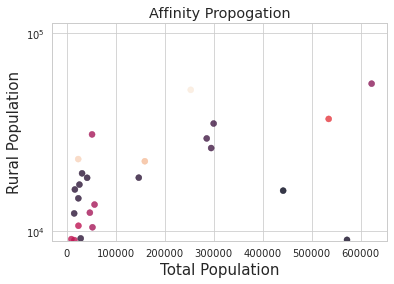

clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]


<Figure size 720x504 with 0 Axes>

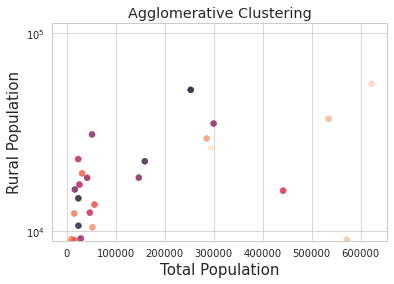

clusters: [0 1 2 3 4]


<Figure size 720x504 with 0 Axes>

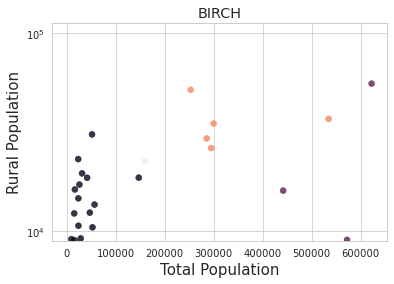

clusters: [-1  0  1]


<Figure size 720x504 with 0 Axes>

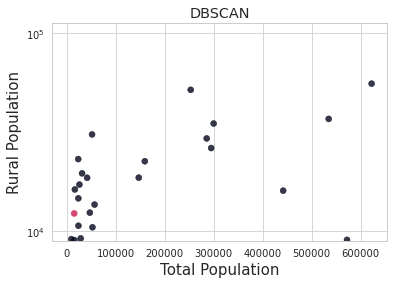

clusters: [0 1 2 3 4]


<Figure size 720x504 with 0 Axes>

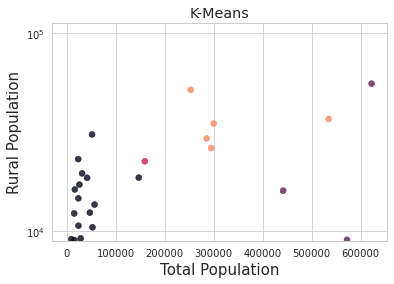

clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


<Figure size 720x504 with 0 Axes>

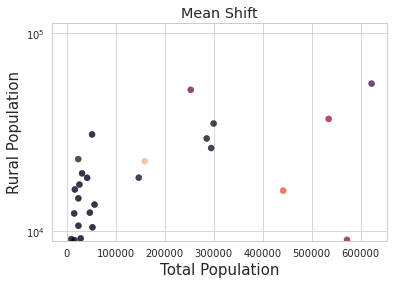

clusters: [-1  0  1  2]


<Figure size 720x504 with 0 Axes>

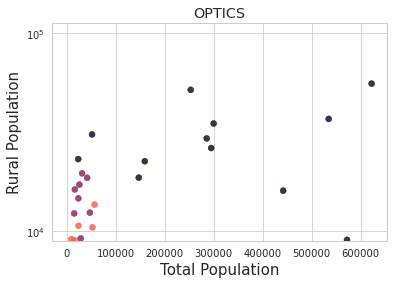

clusters: [0 1 2 3 4]


<Figure size 720x504 with 0 Axes>

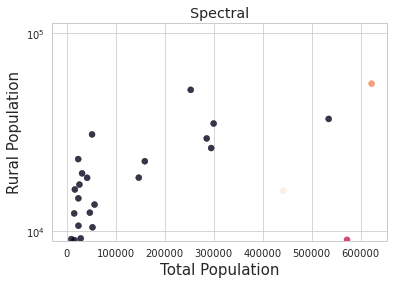

clusters: [0 1 2 3 4]


<Figure size 720x504 with 0 Axes>

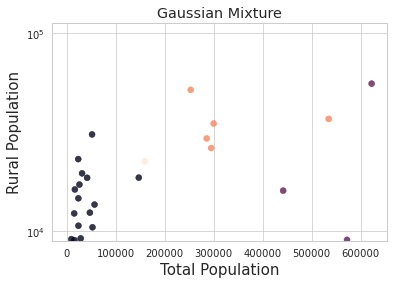

In [24]:
# Affinity Propogation
model_def = ('alg', AffinityPropagation(damping=0.9, random_state = None))
model = run_uns_clustering(filename, model_def , 'Affinity Propogation', 'Affinity Porpogation Title')

# Agglomerative Clustering
model_def = ('alg', AgglomerativeClustering(distance_threshold=0,n_clusters = None))
model = run_uns_clustering(filename, model_def , 'Agglomerative Clustering', 'Agglomerative Clustering')

# BIRCH
model_def = ('lda', Birch(threshold=0.01, n_clusters=5))
model = run_uns_clustering(filename, model_def , 'BIRCH', 'BIRCH')

# DBSCAN
model_def = ('alg', DBSCAN())
model = run_uns_clustering(filename, model_def , 'DBSCAN', 'DBSCAN')

# K-Means
model_def = ('lda',KMeans(n_clusters = 5))
model = run_uns_clustering(filename, model_def , 'K-Means', 'K-Means')

# Mean Shift
model_def = ('lda',MeanShift())
model = run_uns_clustering(filename, model_def , 'Mean Shift', 'Mean Shift')

# OPTICS
model_def = ('lda',OPTICS())
model = run_uns_clustering(filename, model_def , 'OPTICS', 'OPTICSt')

# Spectral Clustering
model_def = ('lda',SpectralClustering(n_clusters=5))
model = run_uns_clustering(filename, model_def , 'Spectral', 'Spectral')

# Gaussian Mixture
model_def = ('lda',GaussianMixture(n_components=5))
model = run_uns_clustering(filename, model_def , 'Gaussian Mixture', 'Gaussian Mixture')


#print(results)

## Choropleths of Cluster Algorithms
### Prepare the Data Source of the Clustering Data

In [25]:
df

,M1952,M1956,M1960,M1964,M1968,M1972,M1976,M1980,M2020,total_pop,...,two_or_more_races,hisp_latino,not_hisp_latino,total_hisp_latino,state_id_x,county_id_x,designation,state_id_y,county_id_y,desigName
Adams,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0,441603,...,17504,441603,273725,167878,8,1,4.0,8.0,1.0,Urban
Alamosa,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,15445,...,675,15445,8335,7110,8,3,2.0,8.0,3.0,Rural
Arapahoe,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,572003,...,24357,572003,466481,105522,8,5,4.0,8.0,5.0,Urban
Archuleta,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,12084,...,341,12084,9936,2148,8,7,1.0,8.0,7.0,Frontier
Baca,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,3788,...,59,3788,3440,348,8,9,1.0,8.0,9.0,Frontier
Bent,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1,6499,...,126,6499,4514,1985,8,11,1.0,8.0,11.0,Frontier
Boulder,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,294567,...,7881,294567,255291,39276,8,13,4.0,8.0,13.0,Urban
Chaffee,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,17809,...,284,17809,16131,1678,8,15,2.0,8.0,15.0,Rural
Cheyenne,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1,1836,...,18,1836,1658,178,8,17,1.0,8.0,17.0,Frontier
Clear Creek,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,9088,...,156,9088,8659,429,8,19,2.0,8.0,19.0,Rural


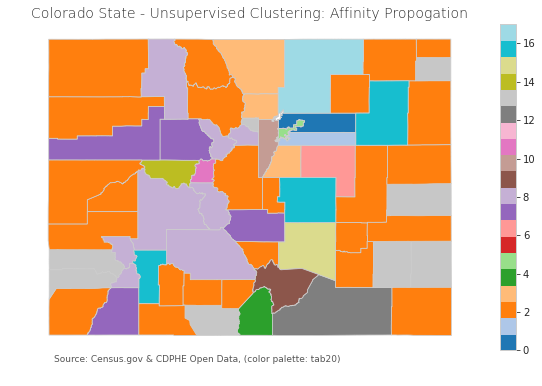

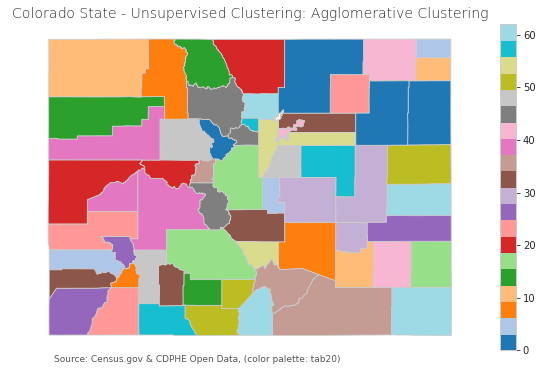

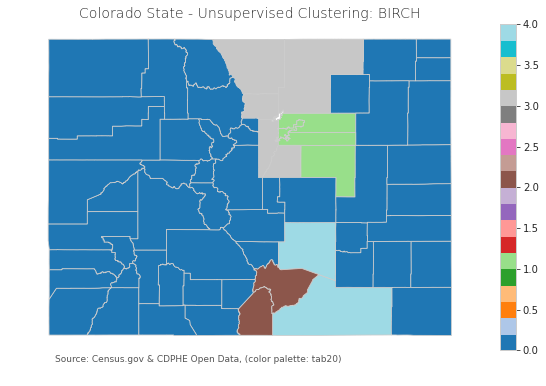

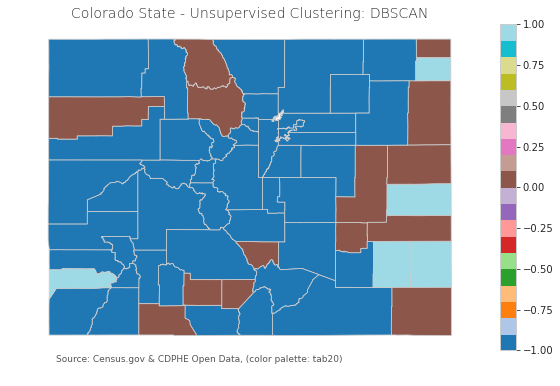

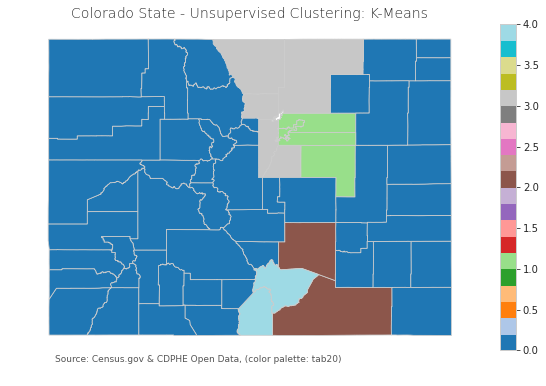

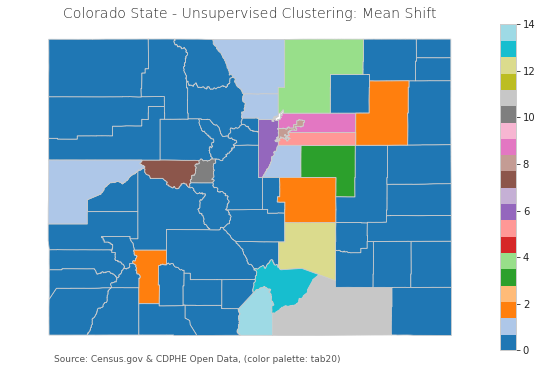

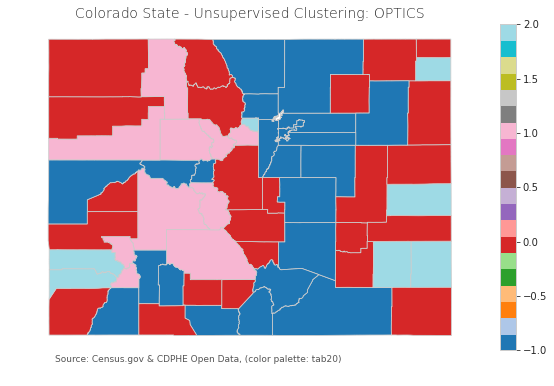

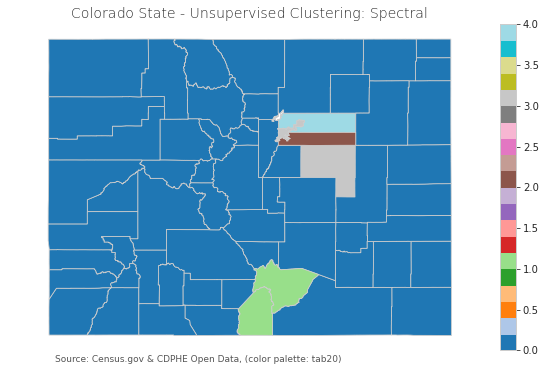

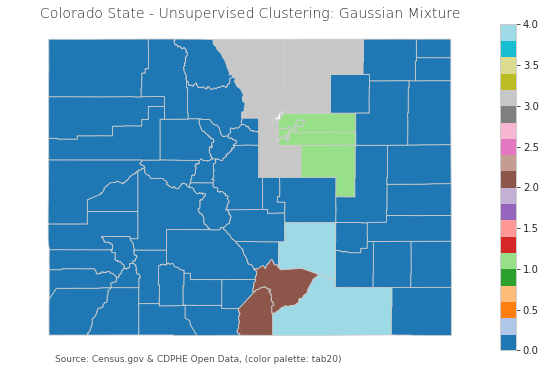

In [26]:
results_df = pd.DataFrame.from_dict(results)

df = results_df.copy(deep = True)
df = df.T
df['state_id'] = "08"
df['county_id'] = [county_fips[v] for v in df.index]
algo_list = ['Affinity Propogation','Agglomerative Clustering','BIRCH', 'DBSCAN', 'K-Means', 
             'Mean Shift', 'OPTICS', 'Spectral', 'Gaussian Mixture']
color_list = ['tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
    'tab20c', 'tab20c_r', 'terrain', 'terrain_r' ]

for alg in algo_list:
    gen_colo_choropleth_clstrs(df, "Colorado State - Unsupervised Clustering: " + alg, alg, palette = 'tab20')



---
# Principal Component Analysis

Reference Jason Brownlee Machine Learning withh Python

In [27]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
'''
Feature Extraction for Principal Component Analysis
'''

filename =  "../models/ep_census2010_population.b"
names    = ['M1952', 'M1956', 'M1960', 'M1964', 'M1968', 'M1972', 'M1976', 'M1980',
            'M2020', 'total_pop', 'total_urb_rur', 'urban', 'urban_ins_ars',
            'urban_ins_cls', 'rural', 'total_race', 'white', 'black',
            'american_indian', 'asian', 'nat_hawaiian', 'some_othr_race',
            'two_or_more_races', 'hisp_latino', 'not_hisp_latino',
            'total_hisp_latino', 'state_id', 'county_id']

data = get_dataset(filename, drop_columns = ['state_id', 'county_id'])


# Check for nulls
assert (data.isnull().sum().sum() == 0) , "Data contains null values."
X = data.values

random_state = None

array = data.values
X = array
pca = PCA(n_components=26)
fit = pca.fit(X)

# summarize components
#print("Explained Variance: %s" % fit.explained_variance_ratio_)
#print(fit.components_)

var_dict = {k:v for k,v in zip(names[0:26], fit.explained_variance_ratio_ )}

print(var_dict)

{'M1952': 0.9922052807758518, 'M1956': 0.0048970590371190965, 'M1960': 0.0020830679014403287, 'M1964': 0.0005443256231577423, 'M1968': 0.0002454424160321696, 'M1972': 1.3477170729345143e-05, 'M1976': 6.834433738454081e-06, 'M1980': 3.042730599477262e-06, 'M2020': 1.4672684804595579e-06, 'total_pop': 2.6393734905093205e-09, 'total_urb_rur': 1.3221888876028854e-12, 'urban': 1.0330147354533338e-12, 'urban_ins_ars': 4.852606344107973e-13, 'urban_ins_cls': 2.281352084095054e-13, 'rural': 1.9887293957594416e-13, 'total_race': 1.136666294937606e-13, 'white': 6.987168610888119e-14, 'black': 2.667184880222755e-14, 'american_indian': 3.7083057388348056e-32, 'asian': 9.690003685029049e-33, 'nat_hawaiian': 9.690003685029049e-33, 'some_othr_race': 9.690003685029049e-33, 'two_or_more_races': 9.690003685029049e-33, 'hisp_latino': 9.690003685029049e-33, 'not_hisp_latino': 9.690003685029049e-33, 'total_hisp_latino': 3.7520153207436744e-33}


In [28]:
print(__doc__)
variance_series = pd.Series(var_dict)
variance_series.values.cumsum()


Feature Extraction for Principal Component Analysis



array([0.99220528, 0.99710234, 0.99918541, 0.99972973, 0.99997518,
       0.99998865, 0.99999549, 0.99999853, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

## Colorado Voting History

In [29]:
fn = "../data/processed/colorado_red_blue_green_1876_2020.xlsx"
elect_df = pd.read_excel(fn, sheet_name=0, index_col = None, skiprows = 0, skipfooter = 4, verbose = True)

Reading sheet 0


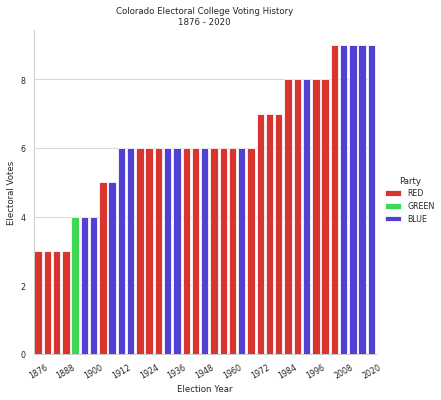

In [30]:
colors = {'RED': "#f71911", 'GREEN': "#26f041", 'BLUE': "#3c28ed"}
%matplotlib inline
#plt.figure(figsize = (36,6))
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)   
#place the legend outside the figure/plot
#plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

g = sns.catplot(x = "Election", y = "Electoral Votes", kind = "bar", hue = "Party" , 
            palette = colors, data = elect_df, dodge=False)
g.fig.set_figwidth(6)
g.fig.set_figheight(5)

g.set_xticklabels(rotation=30)
plt.title("Colorado Electoral College Voting History\n1876 - 2020")
#plt.legend(loc = 'upper left')
locs, labels = plt.xticks()
#print(f'locs: {locs}\nlabels: {labels}')
# We change the fontsize of minor ticks label 
plt.xticks([0,    3,    6,    9,    12,    15,   18,   21,   24,   27,   30,   33,   36],
          [1876, 1888, 1900, 1912, 1924, 1936, 1948, 1960, 1972, 1984, 1996, 2008, 2020])
g.set_ylabels("Electoral Votes")
g.set_xlabels("Election Year")
fn = '../img/colorado_voting_history_1876_2020.png'
plt.savefig(fn, bbox_inches="tight", dpi = 600)
plt.show()